## <center> Network Intrusions Detection Case Study</center>

###### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sn
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import mean_squared_error
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
%matplotlib inline
import warnings

In [2]:
warnings.filterwarnings("ignore")

###### Importing Dataset

In [3]:
data_of_Attack_Back_BufferOverflow_df = pd.read_csv("E:\CS\DS360\DS360-20230716T150307Z-001\DS360\Data Science 360\Data Science 360\Machine Learning\Case Studies\Evaluation Case Study\Cyber Security Case Study\Data_of_Attack_Back_BufferOverflow.csv")
data_of_Attack_Back_FTPWrite_df = pd.read_csv("E:\CS\DS360\DS360-20230716T150307Z-001\DS360\Data Science 360\Data Science 360\Machine Learning\Case Studies\Evaluation Case Study\Cyber Security Case Study\Data_of_Attack_Back_BufferOverflow.csv")
data_of_Attack_Back_GuessPassword_df = pd.read_csv("E:\CS\DS360\DS360-20230716T150307Z-001\DS360\Data Science 360\Data Science 360\Machine Learning\Case Studies\Evaluation Case Study\Cyber Security Case Study\Data_of_Attack_Back_GuessPassword.csv")
data_of_Attack_Back_Neptune_df = pd.read_csv("E:\CS\DS360\DS360-20230716T150307Z-001\DS360\Data Science 360\Data Science 360\Machine Learning\Case Studies\Evaluation Case Study\Cyber Security Case Study\Data_of_Attack_Back_Neptune.csv")
data_of_Attack_Back_NMap_df = pd.read_csv("E:\CS\DS360\DS360-20230716T150307Z-001\DS360\Data Science 360\Data Science 360\Machine Learning\Case Studies\Evaluation Case Study\Cyber Security Case Study\Data_of_Attack_Back_NMap.csv")
data_of_Attack_Back_Normal_df = pd.read_csv("E:\CS\DS360\DS360-20230716T150307Z-001\DS360\Data Science 360\Data Science 360\Machine Learning\Case Studies\Evaluation Case Study\Cyber Security Case Study\Data_of_Attack_Back_Normal.csv")
data_of_Attack_Back_PortSweep_df = pd.read_csv("E:\CS\DS360\DS360-20230716T150307Z-001\DS360\Data Science 360\Data Science 360\Machine Learning\Case Studies\Evaluation Case Study\Cyber Security Case Study\Data_of_Attack_Back_PortSweep.csv")
data_of_Attack_Back_RootKit_df = pd.read_csv("E:\CS\DS360\DS360-20230716T150307Z-001\DS360\Data Science 360\Data Science 360\Machine Learning\Case Studies\Evaluation Case Study\Cyber Security Case Study\Data_of_Attack_Back_RootKit.csv")
data_of_Attack_Back_Satan_df = pd.read_csv("E:\CS\DS360\DS360-20230716T150307Z-001\DS360\Data Science 360\Data Science 360\Machine Learning\Case Studies\Evaluation Case Study\Cyber Security Case Study\Data_of_Attack_Back_Satan.csv")
data_of_Attack_Back_Smurf_df = pd.read_csv("E:\CS\DS360\DS360-20230716T150307Z-001\DS360\Data Science 360\Data Science 360\Machine Learning\Case Studies\Evaluation Case Study\Cyber Security Case Study\Data_of_Attack_Back_Smurf.csv")

In [4]:
#temp1 = ''
temp2 = 'BufferOverflow' 
temp3 = 'FTPWrite'
temp4 = 'GuessPassword'
temp5 = 'Neptune'
temp6 = 'NMap'
temp7 = 'Normal'
temp8 = 'PortSweep'
temp9 = 'RootKit'
temp10 = 'Satan'
temp11 = 'Smurf'

data_of_Attack_Back_BufferOverflow_df['attack'] = temp2
data_of_Attack_Back_FTPWrite_df['attack'] = temp3
data_of_Attack_Back_GuessPassword_df['attack'] = temp4
data_of_Attack_Back_Neptune_df['attack'] = temp5
data_of_Attack_Back_NMap_df['attack'] = temp6
data_of_Attack_Back_Normal_df['attack'] = temp7
data_of_Attack_Back_PortSweep_df['attack'] = temp8
data_of_Attack_Back_RootKit_df['attack'] = temp9
data_of_Attack_Back_Satan_df['attack'] = temp10
data_of_Attack_Back_Smurf_df['attack'] = temp11

In [5]:
data_of_Attack_Back_BufferOverflow_df.shape, data_of_Attack_Back_FTPWrite_df.shape, data_of_Attack_Back_GuessPassword_df.shape, data_of_Attack_Back_Neptune_df.shape, data_of_Attack_Back_NMap_df.shape, data_of_Attack_Back_Normal_df.shape, data_of_Attack_Back_PortSweep_df.shape, data_of_Attack_Back_RootKit_df.shape, data_of_Attack_Back_Satan_df.shape, data_of_Attack_Back_Smurf_df.shape

((30, 42),
 (30, 42),
 (53, 42),
 (227228, 42),
 (1554, 42),
 (576710, 42),
 (2964, 42),
 (10, 42),
 (5019, 42),
 (3007, 42))

In [6]:
train_df= pd.concat([data_of_Attack_Back_BufferOverflow_df, data_of_Attack_Back_FTPWrite_df, data_of_Attack_Back_GuessPassword_df, data_of_Attack_Back_Neptune_df, data_of_Attack_Back_NMap_df, data_of_Attack_Back_Normal_df, data_of_Attack_Back_PortSweep_df, data_of_Attack_Back_RootKit_df, data_of_Attack_Back_Satan_df, data_of_Attack_Back_Smurf_df])

In [7]:
train_df.columns

Index(['duration', ' protocol_type', ' service', ' flag', ' src_bytes',
       ' dst_bytes', ' land', ' wrong_fragment', ' urgent', ' hot',
       ' num_failed_logins', ' logged_in', ' num_compromised', ' root_shell',
       ' su_attempted', ' num_root', ' num_file_creations', ' num_shells',
       ' num_access_files', ' num_outbound_cmds', ' is_host_login',
       ' is_guest_login', ' count', ' srv_count', ' serror_rate',
       ' srv_error_rate', ' rerror_rate', ' srv_rerror_rate', ' same_srv_rate',
       ' diff_srv_rate', ' srv_diff_host_rate', ' dst_host_count',
       ' dst_host_srv_count', ' dst_host_same_srv_rate',
       ' dst_host_diff_srv_rate', ' dst_host_same_src_port_rate',
       ' dst_host_srv_diff_host_rate', ' dst_host_serror_rate',
       ' dst_host_srv_serror_rate', ' dst_host_rerror_rate',
       ' dst_host_srv_rerror_rate', 'attack'],
      dtype='object')

###### Checking Null Values

In [8]:
train_df.isnull().sum()

duration                        0
 protocol_type                  0
 service                        0
 flag                           0
 src_bytes                      0
 dst_bytes                      0
 land                           0
 wrong_fragment                 0
 urgent                         0
 hot                            0
 num_failed_logins              0
 logged_in                      0
 num_compromised                0
 root_shell                     0
 su_attempted                   0
 num_root                       0
 num_file_creations             0
 num_shells                     0
 num_access_files               0
 num_outbound_cmds              0
 is_host_login                  0
 is_guest_login                 0
 count                          0
 srv_count                      0
 serror_rate                    0
 srv_error_rate                 0
 rerror_rate                    0
 srv_rerror_rate                0
 same_srv_rate                  0
 diff_srv_rate

In [9]:
test_df = pd.read_csv("E:\CS\DS360\DS360-20230716T150307Z-001\DS360\Data Science 360\Data Science 360\Machine Learning\Case Studies\Evaluation Case Study\Cyber Security Case Study\Data_of_attack_Back.csv")

In [10]:
test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,0,0,0.0,0.5454,0.08314,0,0,0,0.2,...,0.001,0.001,0.1,0,0.100,0,0.0,0.0,0.0,0.0
1,0.0,0,0,0.0,0.5454,0.08314,0,0,0,0.2,...,0.002,0.002,0.1,0,0.050,0,0.0,0.0,0.0,0.0
2,0.0,0,0,0.0,0.5454,0.08314,0,0,0,0.2,...,0.003,0.003,0.1,0,0.033,0,0.0,0.0,0.0,0.0
3,0.0,0,0,0.0,0.5454,0.08314,0,0,0,0.2,...,0.004,0.004,0.1,0,0.025,0,0.0,0.0,0.0,0.0
4,0.0,0,0,0.0,0.5454,0.08314,0,0,0,0.2,...,0.005,0.005,0.1,0,0.020,0,0.0,0.0,0.0,0.0


In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968 entries, 0 to 967
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   duration                      968 non-null    float64
 1    protocol_type                968 non-null    int64  
 2    service                      968 non-null    int64  
 3    flag                         968 non-null    float64
 4    src_bytes                    968 non-null    float64
 5    dst_bytes                    968 non-null    float64
 6    land                         968 non-null    int64  
 7    wrong_fragment               968 non-null    int64  
 8    urgent                       968 non-null    int64  
 9    hot                          968 non-null    float64
 10   num_failed_logins            968 non-null    int64  
 11   logged_in                    968 non-null    float64
 12   num_compromised              968 non-null    float64
 13   root

In [12]:
test_df.columns

Index(['duration', ' protocol_type', ' service', ' flag', ' src_bytes',
       ' dst_bytes', ' land', ' wrong_fragment', ' urgent', ' hot',
       ' num_failed_logins', ' logged_in', ' num_compromised', ' root_shell',
       ' su_attempted', ' num_root', ' num_file_creations', ' num_shells',
       ' num_access_files', ' num_outbound_cmds', ' is_host_login',
       ' is_guest_login', ' count', ' srv_count', ' serror_rate',
       ' srv_error_rate', ' rerror_rate', ' srv_rerror_rate', ' same_srv_rate',
       ' diff_srv_rate', ' srv_diff_host_rate', ' dst_host_count',
       ' dst_host_srv_count', ' dst_host_same_srv_rate',
       ' dst_host_diff_srv_rate', ' dst_host_same_src_port_rate',
       ' dst_host_srv_diff_host_rate', ' dst_host_serror_rate',
       ' dst_host_srv_serror_rate', ' dst_host_rerror_rate',
       ' dst_host_srv_rerror_rate'],
      dtype='object')

In [13]:
train_df.columns = train_df.columns.str.strip()
test_df.columns = test_df.columns.str.strip()

In [14]:
train_df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_error_rate',
       'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack'],
      dtype='object')

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816605 entries, 0 to 3006
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     816605 non-null  float64
 1   protocol_type                816605 non-null  float64
 2   service                      816605 non-null  float64
 3   flag                         816605 non-null  float64
 4   src_bytes                    816605 non-null  float64
 5   dst_bytes                    816605 non-null  float64
 6   land                         816605 non-null  int64  
 7   wrong_fragment               816605 non-null  float64
 8   urgent                       816605 non-null  float64
 9   hot                          816605 non-null  float64
 10  num_failed_logins            816605 non-null  float64
 11  logged_in                    816605 non-null  float64
 12  num_compromised              816605 non-null  float64
 13  r

###### Checking Data distribution

In [16]:
train_df['attack'].value_counts()

Normal            576710
Neptune           227228
Satan               5019
Smurf               3007
PortSweep           2964
NMap                1554
GuessPassword         53
BufferOverflow        30
FTPWrite              30
RootKit               10
Name: attack, dtype: int64

#### Converting the categorical type variable into numeric

In [17]:
le = LabelEncoder()

In [18]:
train_df['attack_num'] = le.fit_transform(train_df['attack'])

In [19]:
attack_names = train_df.loc[:, ['attack_num', 'attack']]

In [20]:
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,attack_num
0,0.0184,0.0,0.05,0.0,0.01511,0.02957,0,0.0,0.0,0.3,...,0.1,0.0,0.10,0.067,0.0,0.0,0.0,0.0,BufferOverflow,0
1,0.0305,0.0,0.05,0.0,0.01735,0.02766,0,0.0,0.0,0.3,...,0.1,0.0,0.05,0.050,0.0,0.0,0.0,0.0,BufferOverflow,0
2,0.0150,0.0,0.05,0.0,0.01587,0.06707,0,0.0,0.0,0.1,...,0.1,0.0,0.10,0.000,0.0,0.0,0.0,0.0,BufferOverflow,0
3,0.0060,0.0,0.05,0.0,0.02328,0.04551,0,0.0,0.0,0.3,...,0.1,0.0,0.10,0.000,0.0,0.0,0.0,0.0,BufferOverflow,0
4,0.0158,0.0,0.05,0.0,0.01567,0.03095,0,0.0,0.0,0.3,...,0.1,0.0,0.05,0.000,0.0,0.0,0.0,0.0,BufferOverflow,0


In [21]:
train_df.drop(columns=['attack'], inplace=True)

In [22]:
train_df.rename(columns={'attack_num':'attack'}, inplace=True)

In [23]:
pf1 = train_df['attack']

In [24]:
train_df.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0.0184,0.0,0.05,0.0,0.01511,0.02957,0,0.0,0.0,0.3,...,0.003,0.1,0.0,0.10,0.067,0.0,0.0,0.0,0.0,0
1,0.0305,0.0,0.05,0.0,0.01735,0.02766,0,0.0,0.0,0.3,...,0.004,0.1,0.0,0.05,0.050,0.0,0.0,0.0,0.0,0
2,0.0150,0.0,0.05,0.0,0.01587,0.06707,0,0.0,0.0,0.1,...,0.001,0.1,0.0,0.10,0.000,0.0,0.0,0.0,0.0,0


In [25]:
train_df.shape

(816605, 42)

In [26]:
class_distribution = train_df['attack'].value_counts()

In [27]:
class_distribution

5    576710
4    227228
8      5019
9      3007
6      2964
3      1554
2        53
0        30
1        30
7        10
Name: attack, dtype: int64

In [28]:
def continous_var_summary(x):
    
    # Freq and missing
    n_total = x.shape[0]
    n_miss = x.isna().sum()
    n_miss_percentage = ( n_miss * 100 ) /n_total
    
    # outliers using iqr method
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lc_iqr = q1 - 1.5 * iqr
    uc_iqr = q3 + 1.5 * iqr
    
    return pd.Series([ x.dtype, x.nunique(), n_total, x.count(), n_miss, n_miss_percentage,
                      x.sum(), x.mean(), x.std(), x.var(), lc_iqr, uc_iqr, 
                     x.min(), x.quantile(0.01), x.quantile(0.05), x.quantile(0.10),
                     x.quantile(0.25), x.quantile(0.50), x.quantile(0.75), x.quantile(0.90),
                               x.quantile(0.95), x.quantile(0.99), x.max()], 
                     
                    index=['dtype', 'nunique','total', 'count', 'n_miss', 'n_miss_percent',
                           'sum', 'mean', 'std', 'var', 'lc_iqr', 'uc_iqr',
                           'min', 'p1', 'p5', 'p10',
                           'p25', 'p50', 'p75', 'p90', 'p95', 'p99', 'max'])

In [29]:
train_df.apply(continous_var_summary)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
dtype,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32
nunique,918,3,67,11,5870,18398,1,2,5,11,...,256,101,101,101,68,101,97,101,100,10
total,816605,816605,816605,816605,816605,816605,816605,816605,816605,816605,...,816605,816605,816605,816605,816605,816605,816605,816605,816605,816605
count,816605,816605,816605,816605,816605,816605,816605,816605,816605,816605,...,816605,816605,816605,816605,816605,816605,816605,816605,816605,816605
n_miss,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
n_miss_percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sum,717.0555,465.68,43256.46,16474.27,3537.09137,20248.8071,0,0.3,1.8,1827.9,...,132016.697,54513.521,2763.12,5025.278,1375.738,20328.404,20317.479,4385.96,4309.698,3882329
mean,0.000878,0.00057,0.052971,0.020174,0.004331,0.024796,0.0,0.0,0.000002,0.002238,...,0.161665,0.066756,0.003384,0.006154,0.001685,0.024894,0.02488,0.005371,0.005278,4.754231
std,0.026651,0.002597,0.096426,0.030964,0.027707,0.066647,0.0,0.000332,0.000767,0.040992,...,0.111665,0.043431,0.00856,0.01747,0.003712,0.043078,0.043168,0.021929,0.02208,0.587768
var,0.00071,0.000007,0.009298,0.000959,0.000768,0.004442,0.0,0.0,0.000001,0.00168,...,0.012469,0.001886,0.000073,0.000305,0.000014,0.001856,0.001863,0.000481,0.000488,0.345471


In [30]:
test_df.apply(continous_var_summary)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
dtype,float64,int64,int64,float64,float64,float64,int64,int64,int64,float64,...,float64,float64,float64,int64,float64,int64,float64,float64,float64,float64
nunique,14,1,1,4,43,8,1,1,1,4,...,255,255,1,1,20,1,5,5,51,51
total,968,968,968,968,968,968,968,968,968,968,...,968,968,968,968,968,968,968,968,968,968
count,968,968,968,968,968,968,968,968,968,968,...,968,968,968,968,968,968,968,968,968,968
n_miss,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
n_miss_percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sum,0.0284,0,0,7.29,519.49552,78.69751,0,0,0,185.6,...,141.733,141.733,96.8,0,2.246,0,0.197,0.197,6.153,6.153
mean,0.000029,0.0,0.0,0.007531,0.536669,0.081299,0.0,0.0,0.0,0.191736,...,0.146418,0.146418,0.1,0.0,0.00232,0.0,0.000204,0.000204,0.006356,0.006356
std,0.000166,0.0,0.0,0.023243,0.047225,0.009191,0.0,0.0,0.0,0.031408,...,0.090727,0.090727,0.0,0.0,0.007889,0.0,0.00055,0.00055,0.011003,0.011003
var,0.0,0.0,0.0,0.00054,0.00223,0.000084,0.0,0.0,0.0,0.000986,...,0.008231,0.008231,0.0,0.0,0.000062,0.0,0.0,0.0,0.000121,0.000121


##### Defining the target variable

In [31]:
train_df['attack']

0       0
1       0
2       0
3       0
4       0
       ..
3002    9
3003    9
3004    9
3005    9
3006    9
Name: attack, Length: 816605, dtype: int32

In [32]:
def map_activity(attack_value):
    if attack_value in [0, 1, 2, 3, 4, 6, 7, 8, 9]:
        return 1
    else:
        return 0

In [33]:
train_df['activity'] = train_df['attack'].apply(map_activity)

In [34]:
train_df['activity'].value_counts()

0    576710
1    239895
Name: activity, dtype: int64

In [35]:
train_df=train_df.apply(lambda x: x.clip(lower=x.dropna().quantile(0.01), upper=x.quantile(0.99)))

In [36]:
train_df.apply(continous_var_summary)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,activity
dtype,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,int32,int64
nunique,17,2,54,8,4104,16660,1,1,1,1,...,101,41,101,19,101,97,101,100,3,2
total,816605,816605,816605,816605,816605,816605,816605,816605,816605,816605,...,816605,816605,816605,816605,816605,816605,816605,816605,816605,816605
count,816605,816605,816605,816605,816605,816605,816605,816605,816605,816605,...,816605,816605,816605,816605,816605,816605,816605,816605,816605,816605
n_miss,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
n_miss_percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sum,22.2446,409.85,42913.23,16443.59,2546.63236,18655.43096,0,0.0,0.0,0.0,...,54513.521,2467.085,5025.278,1293.425,20328.404,20317.479,4385.96,4309.698,3865130,239895
mean,0.000027,0.000502,0.052551,0.020137,0.003119,0.022845,0.0,0.0,0.0,0.0,...,0.066756,0.003021,0.006154,0.001584,0.024894,0.02488,0.005371,0.005278,4.73317,0.293771
std,0.000181,0.002183,0.094194,0.030894,0.006808,0.049713,0.0,0.0,0.0,0.0,...,0.043431,0.00535,0.01747,0.002783,0.043078,0.043168,0.021929,0.02208,0.471776,0.455489
var,0.0,0.000005,0.008873,0.000954,0.000046,0.002471,0.0,0.0,0.0,0.0,...,0.001886,0.000029,0.000305,0.000008,0.001856,0.001863,0.000481,0.000488,0.222573,0.20747


##### Dropping variables on basis of only zeros

In [37]:
for i in train_df:
    print("non_Zeros in",i,':',(np.count_nonzero(train_df[i])))

non_Zeros in duration : 35218
non_Zeros in protocol_type : 40985
non_Zeros in service : 355242
non_Zeros in flag : 246636
non_Zeros in src_bytes : 570859
non_Zeros in dst_bytes : 537266
non_Zeros in land : 0
non_Zeros in wrong_fragment : 0
non_Zeros in urgent : 0
non_Zeros in hot : 0
non_Zeros in num_failed_logins : 0
non_Zeros in logged_in : 520751
non_Zeros in num_compromised : 0
non_Zeros in root_shell : 0
non_Zeros in su_attempted : 0
non_Zeros in num_root : 0
non_Zeros in num_file_creations : 0
non_Zeros in num_shells : 0
non_Zeros in num_access_files : 0
non_Zeros in num_outbound_cmds : 0
non_Zeros in is_host_login : 0
non_Zeros in is_guest_login : 0
non_Zeros in count : 816605
non_Zeros in srv_count : 816605
non_Zeros in serror_rate : 209955
non_Zeros in srv_error_rate : 211416
non_Zeros in rerror_rate : 46148
non_Zeros in srv_rerror_rate : 48041
non_Zeros in same_srv_rate : 816605
non_Zeros in diff_srv_rate : 239714
non_Zeros in srv_diff_host_rate : 236315
non_Zeros in dst_host

In [38]:
train_df.drop(columns=['land', 'wrong_fragment', 'urgent', 'hot' , 'num_failed_logins', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds' ,'is_host_login', 'is_guest_login'], inplace=True)
test_df.drop(columns=['land', 'wrong_fragment', 'urgent', 'hot' , 'num_failed_logins', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds' ,'is_host_login', 'is_guest_login'], inplace=True)

In [39]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816605 entries, 0 to 3006
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     816605 non-null  float64
 1   protocol_type                816605 non-null  float64
 2   service                      816605 non-null  float64
 3   flag                         816605 non-null  float64
 4   src_bytes                    816605 non-null  float64
 5   dst_bytes                    816605 non-null  float64
 6   logged_in                    816605 non-null  float64
 7   count                        816605 non-null  float64
 8   srv_count                    816605 non-null  float64
 9   serror_rate                  816605 non-null  float64
 10  srv_error_rate               816605 non-null  float64
 11  rerror_rate                  816605 non-null  float64
 12  srv_rerror_rate              816605 non-null  float64
 13  s

In [40]:
train_df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'logged_in', 'count', 'srv_count', 'serror_rate',
       'srv_error_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack', 'activity'],
      dtype='object')

#### Feature Scaling

In [41]:
std = StandardScaler()

In [42]:
cols_to_transform = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'logged_in', 'count', 'srv_count', 'serror_rate',
       'srv_error_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate']

In [43]:
train_df[cols_to_transform] = std.fit_transform(train_df[cols_to_transform])
test_df[cols_to_transform] = std.fit_transform(test_df[cols_to_transform])

In [44]:
train_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,logged_in,count,srv_count,serror_rate,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,activity
0,8.686882,-0.229873,-0.027080,-0.651804,1.761491,0.135275,0.753744,-0.656229,-0.683870,-0.576959,...,0.765434,-0.564674,5.371703,5.898360,-0.577872,-0.576361,-0.244926,-0.239022,4,1
1,8.686882,-0.229873,-0.027080,-0.651804,2.090537,0.096855,0.753744,-0.656229,-0.683870,-0.576959,...,0.765434,-0.564674,2.509730,5.898360,-0.577872,-0.576361,-0.244926,-0.239022,4,1
2,8.686882,-0.229873,-0.027080,-0.651804,1.873132,0.889612,0.753744,-0.656229,-0.683870,-0.576959,...,0.765434,-0.564674,5.371703,-0.569103,-0.577872,-0.576361,-0.244926,-0.239022,4,1
3,8.686882,-0.229873,-0.027080,-0.651804,2.961629,0.455919,0.753744,-0.656229,-0.683870,-0.576959,...,0.765434,-0.564674,5.371703,-0.569103,-0.577872,-0.576361,-0.244926,-0.239022,4,1
4,8.686882,-0.229873,-0.027080,-0.651804,1.843753,0.163035,0.753744,-0.656229,-0.683870,-0.576959,...,0.765434,-0.564674,2.509730,-0.569103,-0.577872,-0.576361,-0.244926,-0.239022,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3002,-0.150458,4.350228,0.397576,-0.651804,1.057860,-0.459544,-1.326711,2.176867,6.913261,-0.576959,...,0.719384,-0.377767,5.257224,-0.569103,-0.577872,-0.576361,-0.244926,-0.239022,6,1
3003,-0.150458,4.350228,0.397576,-0.651804,1.057860,-0.459544,-1.326711,2.188199,6.913261,-0.576959,...,0.742409,-0.377767,5.314464,-0.569103,-0.577872,-0.576361,-0.244926,-0.239022,6,1
3004,-0.150458,4.350228,0.397576,-0.651804,1.057860,-0.459544,-1.326711,2.199531,6.913261,-0.576959,...,0.742409,-0.377767,5.314464,-0.569103,-0.577872,-0.576361,-0.244926,-0.239022,6,1
3005,-0.150458,4.350228,0.397576,-0.651804,1.057860,-0.459544,-1.326711,2.210864,6.913261,-0.576959,...,0.765434,-0.377767,5.371703,-0.569103,-0.577872,-0.576361,-0.244926,-0.239022,6,1


In [45]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816605 entries, 0 to 3006
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     816605 non-null  float64
 1   protocol_type                816605 non-null  float64
 2   service                      816605 non-null  float64
 3   flag                         816605 non-null  float64
 4   src_bytes                    816605 non-null  float64
 5   dst_bytes                    816605 non-null  float64
 6   logged_in                    816605 non-null  float64
 7   count                        816605 non-null  float64
 8   srv_count                    816605 non-null  float64
 9   serror_rate                  816605 non-null  float64
 10  srv_error_rate               816605 non-null  float64
 11  rerror_rate                  816605 non-null  float64
 12  srv_rerror_rate              816605 non-null  float64
 13  s

In [46]:
train_df['activity'].value_counts()

0    576710
1    239895
Name: activity, dtype: int64

In [47]:
corr_train_df = train_df.corr()

In [48]:
corr_train_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,logged_in,count,srv_count,serror_rate,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,activity
duration,1.000000,0.028400,-0.030765,-0.079893,0.173388,0.002058,0.065043,-0.094922,-0.086616,-0.086290,...,-0.028471,0.096032,0.026644,-0.023920,-0.084772,-0.085415,-0.001591,0.001686,0.098363,-0.081110
protocol_type,0.028400,1.000000,-0.037156,-0.149832,-0.069765,-0.103193,-0.304975,-0.017766,0.427484,-0.132618,...,0.058117,0.003495,0.255236,-0.058690,-0.131544,-0.132490,-0.039459,-0.054945,0.171599,-0.074229
service,-0.030765,-0.037156,1.000000,0.704702,-0.095521,-0.249622,-0.659281,0.639993,-0.048720,0.661772,...,-0.735508,0.453995,-0.043566,-0.265410,0.662275,0.662302,0.148258,0.150707,-0.660483,0.724964
flag,-0.079893,-0.149832,0.704702,1.000000,-0.296967,-0.297858,-0.862585,0.822354,-0.096631,0.926376,...,-0.881477,0.518032,-0.163689,-0.258745,0.925593,0.927611,0.227144,0.231253,-0.897461,0.954584
src_bytes,0.173388,-0.069765,-0.095521,-0.296967,1.000000,-0.021555,0.278002,-0.257439,-0.079095,-0.262700,...,0.099394,0.017943,0.153340,0.021826,-0.260626,-0.262700,-0.096660,-0.103309,0.269110,-0.283893
dst_bytes,0.002058,-0.103193,-0.249622,-0.297858,-0.021555,1.000000,0.344344,-0.267379,-0.058199,-0.262050,...,0.332435,-0.239799,0.032455,0.123931,-0.263253,-0.263532,-0.108129,-0.104024,0.259837,-0.296125
logged_in,0.065043,-0.304975,-0.659281,-0.862585,0.278002,0.344344,1.000000,-0.755495,-0.085082,-0.761224,...,0.828327,-0.517374,0.011405,0.212761,-0.761738,-0.762341,-0.306094,-0.303048,0.750376,-0.854975
count,-0.094922,-0.017766,0.639993,0.822354,-0.257439,-0.267379,-0.755495,1.000000,0.146473,0.773735,...,-0.771390,0.463664,-0.162452,-0.339984,0.774192,0.777171,0.179026,0.172402,-0.759035,0.855910
srv_count,-0.086616,0.427484,-0.048720,-0.096631,-0.079095,-0.058199,-0.085082,0.146473,1.000000,-0.067149,...,0.128115,-0.136735,-0.006637,-0.122394,-0.067117,-0.067910,-0.077452,-0.078407,0.106474,-0.028131
serror_rate,-0.086290,-0.132618,0.661772,0.926376,-0.262700,-0.262050,-0.761224,0.773735,-0.067149,1.000000,...,-0.822547,0.417999,-0.194711,-0.323681,0.997689,0.996285,-0.136873,-0.134414,-0.884749,0.889239


In [49]:
train_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,logged_in,count,srv_count,serror_rate,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,activity
0,8.686882,-0.229873,-0.027080,-0.651804,1.761491,0.135275,0.753744,-0.656229,-0.683870,-0.576959,...,0.765434,-0.564674,5.371703,5.898360,-0.577872,-0.576361,-0.244926,-0.239022,4,1
1,8.686882,-0.229873,-0.027080,-0.651804,2.090537,0.096855,0.753744,-0.656229,-0.683870,-0.576959,...,0.765434,-0.564674,2.509730,5.898360,-0.577872,-0.576361,-0.244926,-0.239022,4,1
2,8.686882,-0.229873,-0.027080,-0.651804,1.873132,0.889612,0.753744,-0.656229,-0.683870,-0.576959,...,0.765434,-0.564674,5.371703,-0.569103,-0.577872,-0.576361,-0.244926,-0.239022,4,1
3,8.686882,-0.229873,-0.027080,-0.651804,2.961629,0.455919,0.753744,-0.656229,-0.683870,-0.576959,...,0.765434,-0.564674,5.371703,-0.569103,-0.577872,-0.576361,-0.244926,-0.239022,4,1
4,8.686882,-0.229873,-0.027080,-0.651804,1.843753,0.163035,0.753744,-0.656229,-0.683870,-0.576959,...,0.765434,-0.564674,2.509730,-0.569103,-0.577872,-0.576361,-0.244926,-0.239022,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3002,-0.150458,4.350228,0.397576,-0.651804,1.057860,-0.459544,-1.326711,2.176867,6.913261,-0.576959,...,0.719384,-0.377767,5.257224,-0.569103,-0.577872,-0.576361,-0.244926,-0.239022,6,1
3003,-0.150458,4.350228,0.397576,-0.651804,1.057860,-0.459544,-1.326711,2.188199,6.913261,-0.576959,...,0.742409,-0.377767,5.314464,-0.569103,-0.577872,-0.576361,-0.244926,-0.239022,6,1
3004,-0.150458,4.350228,0.397576,-0.651804,1.057860,-0.459544,-1.326711,2.199531,6.913261,-0.576959,...,0.742409,-0.377767,5.314464,-0.569103,-0.577872,-0.576361,-0.244926,-0.239022,6,1
3005,-0.150458,4.350228,0.397576,-0.651804,1.057860,-0.459544,-1.326711,2.210864,6.913261,-0.576959,...,0.765434,-0.377767,5.371703,-0.569103,-0.577872,-0.576361,-0.244926,-0.239022,6,1


In [50]:
correlation_matrix = train_df.corr()

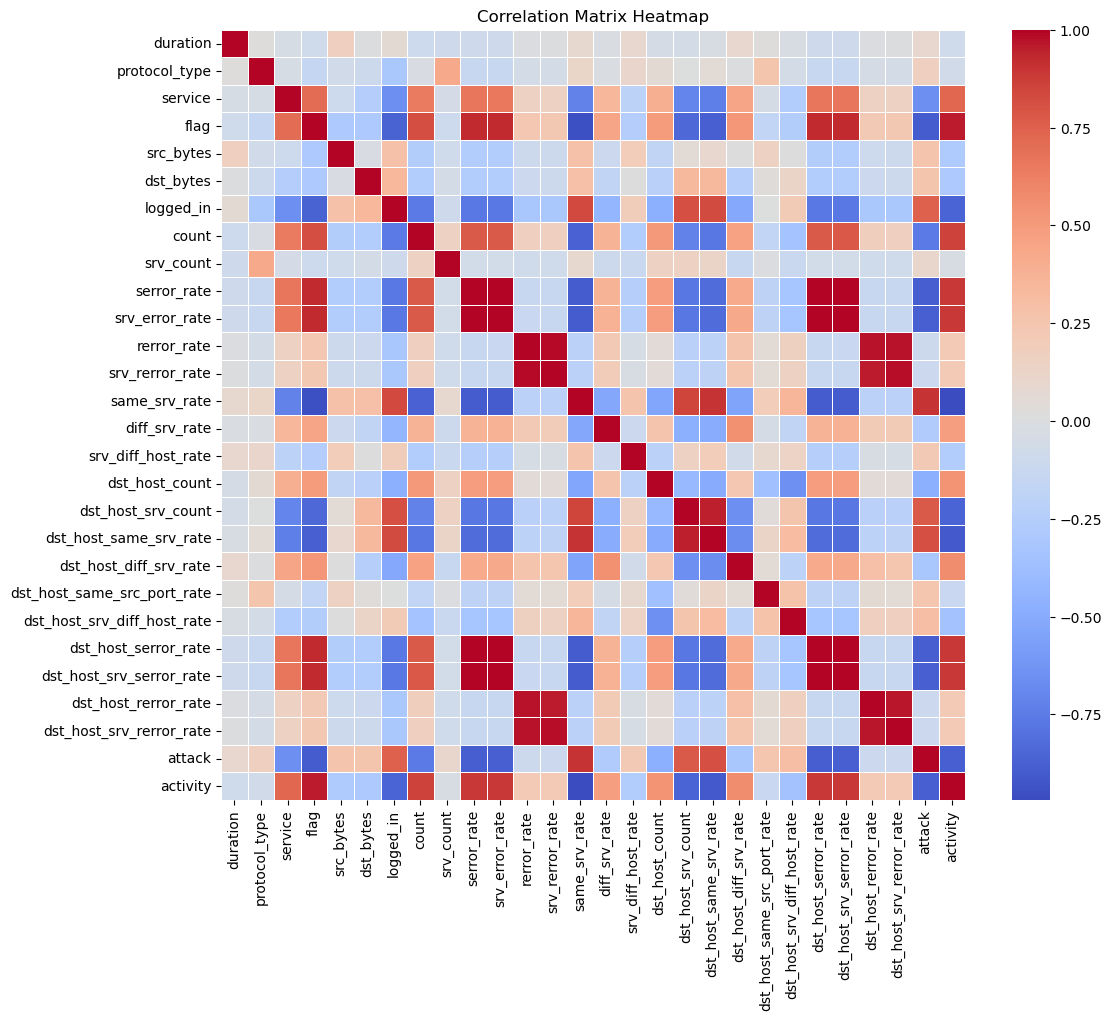

In [51]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [52]:
corr_x_x=correlation_matrix.unstack().sort_values().drop_duplicates().reset_index()
corr_x_x=corr_x_x.loc[(corr_x_x[0]>0.90) | (corr_x_x[0]<-0.90)]['level_0'].drop_duplicates()
corr_x_x

0                 same_srv_rate
2        dst_host_same_srv_rate
360        dst_host_serror_rate
361                 serror_rate
362              srv_error_rate
363    dst_host_srv_serror_rate
364          dst_host_srv_count
365                    activity
366        dst_host_rerror_rate
369    dst_host_srv_rerror_rate
371             srv_rerror_rate
378                    duration
Name: level_0, dtype: object

In [53]:
columns_to_drop = ['flag', 'dst_host_same_srv_rate', 'attack', 'same_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'srv_rerror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'rerror_rate', 'serror_rate', 'srv_error_rate', 'service']

In [54]:
train_df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'logged_in', 'count', 'srv_count', 'serror_rate',
       'srv_error_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack', 'activity'],
      dtype='object')

In [55]:
train_df = train_df.drop(columns=columns_to_drop)

In [56]:
test_df = test_df.drop(columns=['flag', 'dst_host_same_srv_rate', 'same_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'srv_rerror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'rerror_rate', 'serror_rate', 'srv_error_rate', 'service'])

In [57]:
train_df

,duration,protocol_type,src_bytes,dst_bytes,logged_in,count,srv_count,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,activity
0,8.686882,-0.229873,1.761491,0.135275,0.753744,-0.656229,-0.683870,-0.375949,-0.427128,-1.625237,-1.420910,-0.564674,5.371703,5.898360,1
1,8.686882,-0.229873,2.090537,0.096855,0.753744,-0.656229,-0.683870,-0.375949,-0.427128,-1.615439,-1.411955,-0.564674,2.509730,5.898360,1
2,8.686882,-0.229873,1.873132,0.889612,0.753744,-0.656229,-0.683870,-0.375949,-0.427128,-1.625237,-1.438821,-0.564674,5.371703,-0.569103,1
3,8.686882,-0.229873,2.961629,0.455919,0.753744,-0.656229,-0.683870,-0.375949,-0.427128,-1.625237,-1.438821,-0.564674,5.371703,-0.569103,1
4,8.686882,-0.229873,1.843753,0.163035,0.753744,-0.656229,-0.683870,-0.375949,-0.427128,-1.615439,-1.429866,-0.564674,2.509730,-0.569103,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3002,-0.150458,4.350228,1.057860,-0.459544,-1.326711,2.176867,6.913261,-0.375949,-0.427128,0.863249,0.800027,-0.377767,5.257224,-0.569103,1
3003,-0.150458,4.350228,1.057860,-0.459544,-1.326711,2.188199,6.913261,-0.375949,-0.427128,0.863249,0.808982,-0.377767,5.314464,-0.569103,1
3004,-0.150458,4.350228,1.057860,-0.459544,-1.326711,2.199531,6.913261,-0.375949,-0.427128,0.863249,0.817938,-0.377767,5.314464,-0.569103,1
3005,-0.150458,4.350228,1.057860,-0.459544,-1.326711,2.210864,6.913261,-0.375949,-0.427128,0.863249,0.826893,-0.377767,5.371703,-0.569103,1


In [58]:
train_df.columns

Index(['duration', 'protocol_type', 'src_bytes', 'dst_bytes', 'logged_in',
       'count', 'srv_count', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'activity'],
      dtype='object')

In [59]:
test_df.columns

Index(['duration', 'protocol_type', 'src_bytes', 'dst_bytes', 'logged_in',
       'count', 'srv_count', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate'],
      dtype='object')

In [60]:
test_dff = test_df.loc[:, :]

In [61]:
train_df.shape, test_df.shape

((816605, 15), (968, 14))

In [62]:
X , Y = train_df[['duration', 'protocol_type', 'src_bytes', 'dst_bytes', 'logged_in',
       'count', 'srv_count', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate']], train_df['activity']

In [63]:
X.shape, Y.shape

((816605, 14), (816605,))

In [64]:
s = SMOTE()

In [65]:
features, label = s.fit_resample(X,Y)

In [66]:
features.shape, label.shape

((1153420, 14), (1153420,))

In [67]:
features.head()

,duration,protocol_type,src_bytes,dst_bytes,logged_in,count,srv_count,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
0,8.686882,-0.229873,1.761491,0.135275,0.753744,-0.656229,-0.68387,-0.375949,-0.427128,-1.625237,-1.420910,-0.564674,5.371703,5.898360
1,8.686882,-0.229873,2.090537,0.096855,0.753744,-0.656229,-0.68387,-0.375949,-0.427128,-1.615439,-1.411955,-0.564674,2.509730,5.898360
2,8.686882,-0.229873,1.873132,0.889612,0.753744,-0.656229,-0.68387,-0.375949,-0.427128,-1.625237,-1.438821,-0.564674,5.371703,-0.569103
3,8.686882,-0.229873,2.961629,0.455919,0.753744,-0.656229,-0.68387,-0.375949,-0.427128,-1.625237,-1.438821,-0.564674,5.371703,-0.569103
4,8.686882,-0.229873,1.843753,0.163035,0.753744,-0.656229,-0.68387,-0.375949,-0.427128,-1.615439,-1.429866,-0.564674,2.509730,-0.569103


In [68]:
label.head()

0    1
1    1
2    1
3    1
4    1
Name: activity, dtype: int64

In [69]:
df1 = pd.DataFrame(features)
df2 = pd.DataFrame(pd.DataFrame(label))

In [70]:
features

,duration,protocol_type,src_bytes,dst_bytes,logged_in,count,srv_count,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
0,8.686882,-0.229873,1.761491,0.135275,0.753744,-0.656229,-0.683870,-0.375949,-0.427128,-1.625237,-1.420910,-0.564674,5.371703,5.898360
1,8.686882,-0.229873,2.090537,0.096855,0.753744,-0.656229,-0.683870,-0.375949,-0.427128,-1.615439,-1.411955,-0.564674,2.509730,5.898360
2,8.686882,-0.229873,1.873132,0.889612,0.753744,-0.656229,-0.683870,-0.375949,-0.427128,-1.625237,-1.438821,-0.564674,5.371703,-0.569103
3,8.686882,-0.229873,2.961629,0.455919,0.753744,-0.656229,-0.683870,-0.375949,-0.427128,-1.625237,-1.438821,-0.564674,5.371703,-0.569103
4,8.686882,-0.229873,1.843753,0.163035,0.753744,-0.656229,-0.683870,-0.375949,-0.427128,-1.615439,-1.429866,-0.564674,2.509730,-0.569103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1153415,-0.150458,-0.229873,-0.458103,-0.459544,-1.326711,2.376401,0.251161,0.502314,-0.427128,0.863249,-1.244058,0.743676,-0.352244,-0.569103
1153416,-0.150458,-0.229873,-0.458103,-0.459544,-1.326711,-0.418249,-0.340964,3.576234,-0.427128,0.863249,-1.386273,0.930583,-0.352244,-0.569103
1153417,-0.150458,-0.229873,-0.458103,-0.459544,-1.326711,2.246429,-0.333233,0.648691,-0.427128,0.863249,-1.385089,1.117490,-0.352244,-0.569103
1153418,-0.150458,-0.229873,-0.458103,-0.459544,-1.326711,-0.212938,-0.632281,1.819708,-0.427128,0.863249,-1.418319,0.743676,-0.352244,-0.569103


In [71]:
label

0          1
1          1
2          1
3          1
4          1
          ..
1153415    1
1153416    1
1153417    1
1153418    1
1153419    1
Name: activity, Length: 1153420, dtype: int64

In [72]:
df = pd.concat([features, label], axis=1)

In [73]:
df

,duration,protocol_type,src_bytes,dst_bytes,logged_in,count,srv_count,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,activity
0,8.686882,-0.229873,1.761491,0.135275,0.753744,-0.656229,-0.683870,-0.375949,-0.427128,-1.625237,-1.420910,-0.564674,5.371703,5.898360,1
1,8.686882,-0.229873,2.090537,0.096855,0.753744,-0.656229,-0.683870,-0.375949,-0.427128,-1.615439,-1.411955,-0.564674,2.509730,5.898360,1
2,8.686882,-0.229873,1.873132,0.889612,0.753744,-0.656229,-0.683870,-0.375949,-0.427128,-1.625237,-1.438821,-0.564674,5.371703,-0.569103,1
3,8.686882,-0.229873,2.961629,0.455919,0.753744,-0.656229,-0.683870,-0.375949,-0.427128,-1.625237,-1.438821,-0.564674,5.371703,-0.569103,1
4,8.686882,-0.229873,1.843753,0.163035,0.753744,-0.656229,-0.683870,-0.375949,-0.427128,-1.615439,-1.429866,-0.564674,2.509730,-0.569103,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1153415,-0.150458,-0.229873,-0.458103,-0.459544,-1.326711,2.376401,0.251161,0.502314,-0.427128,0.863249,-1.244058,0.743676,-0.352244,-0.569103,1
1153416,-0.150458,-0.229873,-0.458103,-0.459544,-1.326711,-0.418249,-0.340964,3.576234,-0.427128,0.863249,-1.386273,0.930583,-0.352244,-0.569103,1
1153417,-0.150458,-0.229873,-0.458103,-0.459544,-1.326711,2.246429,-0.333233,0.648691,-0.427128,0.863249,-1.385089,1.117490,-0.352244,-0.569103,1
1153418,-0.150458,-0.229873,-0.458103,-0.459544,-1.326711,-0.212938,-0.632281,1.819708,-0.427128,0.863249,-1.418319,0.743676,-0.352244,-0.569103,1


#### BINOMIAL CLASSIFICATION

##### MODEL BUILDING USING LOGISTIC REGRESSION TECHNIQUE

In [74]:
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

In [75]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((922736, 14), (230684, 14), (922736,), (230684,))

In [76]:
x_train.head()

,duration,protocol_type,src_bytes,dst_bytes,logged_in,count,srv_count,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
1050497,-0.150458,-0.229873,-0.458103,-0.459544,-1.326711,1.706993,-0.274794,0.502314,-0.427128,0.863249,-1.376133,1.117490,-0.352244,-0.569103
173980,-0.150458,-0.229873,-0.458103,-0.459544,-1.326711,2.686824,-0.391673,0.209560,-0.427128,0.863249,-1.394044,0.369861,-0.352244,-0.569103
214399,-0.150458,-0.229873,-0.458103,-0.459544,-1.326711,0.703657,0.309601,0.648691,-0.427128,0.863249,-1.286579,1.117490,-0.352244,-0.569103
457970,-0.150458,-0.229873,-0.017416,0.052399,0.753744,-0.610899,-0.450112,-0.375949,-0.427128,-0.714098,0.835849,-0.564674,-0.295005,0.149504
594269,-0.150458,4.350228,-0.392000,-0.432589,-1.326711,0.182367,6.913261,-0.375949,-0.299777,0.863249,0.835849,-0.564674,-0.352244,-0.569103


In [77]:
from sklearn.ensemble import IsolationForest

In [78]:
isolation_forest = IsolationForest()  # Adjust the contamination parameter as needed
isolation_forest.fit(x_train)

IsolationForest()

In [79]:
y_pred_test = isolation_forest.predict(x_test)

In [80]:
y_pred_test

array([-1,  1,  1, ...,  1,  1,  1])

In [86]:
precision = precision_score(y_test, y_pred_test, average=None)
recall = recall_score(y_test, y_pred_test,average=None)
f1 = f1_score(y_test, y_pred_test,average=None)
roc_auc = roc_auc_score(y_test, y_pred_test, average=None)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", roc_auc)

Precision: [0.        0.        0.5466345]
Recall: [0.         0.         0.94565236]
F1-Score: [0.         0.         0.69279737]
AUC-ROC: 0.581246294582262


In [87]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968 entries, 0 to 967
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     968 non-null    float64
 1   protocol_type                968 non-null    float64
 2   src_bytes                    968 non-null    float64
 3   dst_bytes                    968 non-null    float64
 4   logged_in                    968 non-null    float64
 5   count                        968 non-null    float64
 6   srv_count                    968 non-null    float64
 7   diff_srv_rate                968 non-null    float64
 8   srv_diff_host_rate           968 non-null    float64
 9   dst_host_count               968 non-null    float64
 10  dst_host_srv_count           968 non-null    float64
 11  dst_host_diff_srv_rate       968 non-null    float64
 12  dst_host_same_src_port_rate  968 non-null    float64
 13  dst_host_srv_diff_ho

In [88]:
test_df['activity_islotion_forest'] = isolation_forest.predict(test_df)

In [89]:
test_df['activity_islotion_forest'].value_counts()

-1    540
 1    428
Name: activity_islotion_forest, dtype: int64

As we know -1 denotes attack, so there are attack in the test data,and features responsible for attacks.

In [90]:
print("duration, protocol_type, src_bytes, dst_bytes, logged_in, count, srv_count, diff_srv_rate, srv_diff_host_rate, dst_host_count, dst_host_srv_count, dst_host_diff_srv_rate, dst_host_same_src_port_rate, dst_host_srv_diff_host_rate")

duration, protocol_type, src_bytes, dst_bytes, logged_in, count, srv_count, diff_srv_rate, srv_diff_host_rate, dst_host_count, dst_host_srv_count, dst_host_diff_srv_rate, dst_host_same_src_port_rate, dst_host_srv_diff_host_rate


In [91]:
# Multinomial Classification

In [92]:
train_df

,duration,protocol_type,src_bytes,dst_bytes,logged_in,count,srv_count,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,activity
0,8.686882,-0.229873,1.761491,0.135275,0.753744,-0.656229,-0.683870,-0.375949,-0.427128,-1.625237,-1.420910,-0.564674,5.371703,5.898360,1
1,8.686882,-0.229873,2.090537,0.096855,0.753744,-0.656229,-0.683870,-0.375949,-0.427128,-1.615439,-1.411955,-0.564674,2.509730,5.898360,1
2,8.686882,-0.229873,1.873132,0.889612,0.753744,-0.656229,-0.683870,-0.375949,-0.427128,-1.625237,-1.438821,-0.564674,5.371703,-0.569103,1
3,8.686882,-0.229873,2.961629,0.455919,0.753744,-0.656229,-0.683870,-0.375949,-0.427128,-1.625237,-1.438821,-0.564674,5.371703,-0.569103,1
4,8.686882,-0.229873,1.843753,0.163035,0.753744,-0.656229,-0.683870,-0.375949,-0.427128,-1.615439,-1.429866,-0.564674,2.509730,-0.569103,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3002,-0.150458,4.350228,1.057860,-0.459544,-1.326711,2.176867,6.913261,-0.375949,-0.427128,0.863249,0.800027,-0.377767,5.257224,-0.569103,1
3003,-0.150458,4.350228,1.057860,-0.459544,-1.326711,2.188199,6.913261,-0.375949,-0.427128,0.863249,0.808982,-0.377767,5.314464,-0.569103,1
3004,-0.150458,4.350228,1.057860,-0.459544,-1.326711,2.199531,6.913261,-0.375949,-0.427128,0.863249,0.817938,-0.377767,5.314464,-0.569103,1
3005,-0.150458,4.350228,1.057860,-0.459544,-1.326711,2.210864,6.913261,-0.375949,-0.427128,0.863249,0.826893,-0.377767,5.371703,-0.569103,1


In [93]:
df_multi_nom = train_df.loc[ :, :]

In [94]:
df_multi_nom.drop(columns='activity', inplace=True)

In [95]:
pf1 = pd.DataFrame(pf1)

In [96]:
df_multi_nom_final = pd.concat([df_multi_nom, pf1], axis=1)

In [97]:
df_multi_nom_final

,duration,protocol_type,src_bytes,dst_bytes,logged_in,count,srv_count,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,attack
0,8.686882,-0.229873,1.761491,0.135275,0.753744,-0.656229,-0.683870,-0.375949,-0.427128,-1.625237,-1.420910,-0.564674,5.371703,5.898360,0
1,8.686882,-0.229873,2.090537,0.096855,0.753744,-0.656229,-0.683870,-0.375949,-0.427128,-1.615439,-1.411955,-0.564674,2.509730,5.898360,0
2,8.686882,-0.229873,1.873132,0.889612,0.753744,-0.656229,-0.683870,-0.375949,-0.427128,-1.625237,-1.438821,-0.564674,5.371703,-0.569103,0
3,8.686882,-0.229873,2.961629,0.455919,0.753744,-0.656229,-0.683870,-0.375949,-0.427128,-1.625237,-1.438821,-0.564674,5.371703,-0.569103,0
4,8.686882,-0.229873,1.843753,0.163035,0.753744,-0.656229,-0.683870,-0.375949,-0.427128,-1.615439,-1.429866,-0.564674,2.509730,-0.569103,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3002,-0.150458,4.350228,1.057860,-0.459544,-1.326711,2.176867,6.913261,-0.375949,-0.427128,0.863249,0.800027,-0.377767,5.257224,-0.569103,9
3003,-0.150458,4.350228,1.057860,-0.459544,-1.326711,2.188199,6.913261,-0.375949,-0.427128,0.863249,0.808982,-0.377767,5.314464,-0.569103,9
3004,-0.150458,4.350228,1.057860,-0.459544,-1.326711,2.199531,6.913261,-0.375949,-0.427128,0.863249,0.817938,-0.377767,5.314464,-0.569103,9
3005,-0.150458,4.350228,1.057860,-0.459544,-1.326711,2.210864,6.913261,-0.375949,-0.427128,0.863249,0.826893,-0.377767,5.371703,-0.569103,9


In [98]:
X1 , Y1 = df_multi_nom_final[['duration', 'protocol_type', 'src_bytes', 'dst_bytes', 'logged_in',
       'count', 'srv_count', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate']], df_multi_nom_final['attack']

In [99]:
X1.shape, Y1.shape

((816605, 14), (816605,))

In [100]:
features1, label1 = s.fit_resample(X1, Y1)

In [101]:
features.shape, label.shape

((1153420, 14), (1153420,))

In [102]:
features.head()

,duration,protocol_type,src_bytes,dst_bytes,logged_in,count,srv_count,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
0,8.686882,-0.229873,1.761491,0.135275,0.753744,-0.656229,-0.68387,-0.375949,-0.427128,-1.625237,-1.420910,-0.564674,5.371703,5.898360
1,8.686882,-0.229873,2.090537,0.096855,0.753744,-0.656229,-0.68387,-0.375949,-0.427128,-1.615439,-1.411955,-0.564674,2.509730,5.898360
2,8.686882,-0.229873,1.873132,0.889612,0.753744,-0.656229,-0.68387,-0.375949,-0.427128,-1.625237,-1.438821,-0.564674,5.371703,-0.569103
3,8.686882,-0.229873,2.961629,0.455919,0.753744,-0.656229,-0.68387,-0.375949,-0.427128,-1.625237,-1.438821,-0.564674,5.371703,-0.569103
4,8.686882,-0.229873,1.843753,0.163035,0.753744,-0.656229,-0.68387,-0.375949,-0.427128,-1.615439,-1.429866,-0.564674,2.509730,-0.569103


In [103]:
label.head()

0    1
1    1
2    1
3    1
4    1
Name: activity, dtype: int64

In [104]:
df1 = pd.DataFrame(features)
df2 = pd.DataFrame(features)

In [105]:
dff = pd.concat([features1, label1], axis=1)
dff

,duration,protocol_type,src_bytes,dst_bytes,logged_in,count,srv_count,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,attack
0,8.686882,-0.229873,1.761491,0.135275,0.753744,-0.656229,-0.683870,-0.375949,-0.427128,-1.625237,-1.420910,-0.564674,5.371703,5.898360,0
1,8.686882,-0.229873,2.090537,0.096855,0.753744,-0.656229,-0.683870,-0.375949,-0.427128,-1.615439,-1.411955,-0.564674,2.509730,5.898360,0
2,8.686882,-0.229873,1.873132,0.889612,0.753744,-0.656229,-0.683870,-0.375949,-0.427128,-1.625237,-1.438821,-0.564674,5.371703,-0.569103,0
3,8.686882,-0.229873,2.961629,0.455919,0.753744,-0.656229,-0.683870,-0.375949,-0.427128,-1.625237,-1.438821,-0.564674,5.371703,-0.569103,0
4,8.686882,-0.229873,1.843753,0.163035,0.753744,-0.656229,-0.683870,-0.375949,-0.427128,-1.615439,-1.429866,-0.564674,2.509730,-0.569103,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5767095,-0.150458,4.350228,0.305754,-0.459544,-1.326711,0.114182,3.289029,-0.375949,-0.427128,0.863249,0.835849,-0.564674,5.371703,-0.569103,9
5767096,-0.150458,4.350228,1.057860,-0.459544,-1.326711,2.686824,6.913261,-0.375949,-0.427128,0.863249,-0.519949,1.117490,1.971988,-0.569103,9
5767097,-0.150458,4.350228,0.305754,-0.459544,-1.326711,2.686824,6.913261,-0.375949,-0.427128,-0.211668,-0.146709,-0.564674,5.371703,-0.569103,9
5767098,-0.150458,4.350228,1.057860,-0.459544,-1.326711,2.686824,6.913261,-0.375949,-0.427128,0.863249,-1.089700,3.360376,0.562699,-0.569103,9


In [106]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(features1, label1, test_size=0.2, random_state=42)

In [107]:
x_train1.shape, x_test1.shape, y_train1.shape, y_test1.shape

((4613680, 14), (1153420, 14), (4613680,), (1153420,))

In [108]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train1, y_train1)

DecisionTreeClassifier()

In [109]:
y_class_pred_dt1 = dt_classifier.predict(x_test1)

In [110]:
lr_classifier = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr_classifier.fit(x_train1, y_train1)

LogisticRegression(multi_class='multinomial')

In [111]:
y_lr_pred_dt1 = lr_classifier.predict(x_test1)

In [112]:
y_class_pred_dt1

array([4, 3, 8, ..., 9, 5, 5])

In [113]:
class_pred_multi = np.sqrt(mean_squared_error(y_test1, y_class_pred_dt1))
lr_pred_multi =np.sqrt(mean_squared_error(y_test1, y_lr_pred_dt1))

In [114]:
class_pred_multi

0.3562546020354686

In [115]:
lr_pred_multi

0.5706429127846281

In [116]:
test_multi_df = test_dff.loc[:, :]

In [117]:
test_multi_df.drop(columns=['activity_islotion_forest'], inplace=True)

In [118]:
test_multi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968 entries, 0 to 967
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     968 non-null    float64
 1   protocol_type                968 non-null    float64
 2   src_bytes                    968 non-null    float64
 3   dst_bytes                    968 non-null    float64
 4   logged_in                    968 non-null    float64
 5   count                        968 non-null    float64
 6   srv_count                    968 non-null    float64
 7   diff_srv_rate                968 non-null    float64
 8   srv_diff_host_rate           968 non-null    float64
 9   dst_host_count               968 non-null    float64
 10  dst_host_srv_count           968 non-null    float64
 11  dst_host_diff_srv_rate       968 non-null    float64
 12  dst_host_same_src_port_rate  968 non-null    float64
 13  dst_host_srv_diff_ho

In [119]:
df_multi_nom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816605 entries, 0 to 3006
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     816605 non-null  float64
 1   protocol_type                816605 non-null  float64
 2   src_bytes                    816605 non-null  float64
 3   dst_bytes                    816605 non-null  float64
 4   logged_in                    816605 non-null  float64
 5   count                        816605 non-null  float64
 6   srv_count                    816605 non-null  float64
 7   diff_srv_rate                816605 non-null  float64
 8   srv_diff_host_rate           816605 non-null  float64
 9   dst_host_count               816605 non-null  float64
 10  dst_host_srv_count           816605 non-null  float64
 11  dst_host_diff_srv_rate       816605 non-null  float64
 12  dst_host_same_src_port_rate  816605 non-null  float64
 13  d

In [120]:
test_multi_df['attack'] = dt_classifier.predict(test_multi_df)

In [121]:
test_multi_df

,duration,protocol_type,src_bytes,dst_bytes,logged_in,count,srv_count,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,attack
0,-0.176765,0.0,0.184979,0.200391,0.0,-1.433364,-0.895232,-0.094772,3.631234,-1.603649,-1.603649,0.0,12.387734,0.0,8
1,-0.176765,0.0,0.184979,0.200391,0.0,-0.865649,-0.405913,-0.094772,2.272663,-1.592621,-1.592621,0.0,6.046740,0.0,8
2,-0.176765,0.0,0.184979,0.200391,0.0,-0.297933,0.083407,-0.094772,1.572793,-1.581594,-1.581594,0.0,3.890802,0.0,5
3,-0.176765,0.0,0.184979,0.200391,0.0,0.269782,0.083407,-0.094772,-0.485647,-1.570566,-1.570566,0.0,2.876243,0.0,5
4,-0.176765,0.0,0.184979,0.200391,0.0,0.269782,0.083407,-0.094772,-0.485647,-1.559538,-1.559538,0.0,2.242144,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,-0.176765,0.0,0.184979,0.200391,0.0,0.269782,0.083407,-0.094772,-0.485647,-0.556005,-0.556005,0.0,-0.167434,0.0,5
964,-0.176765,0.0,0.184979,0.200391,0.0,0.269782,0.083407,-0.094772,-0.485647,-0.544978,-0.544978,0.0,-0.167434,0.0,5
965,-0.176765,0.0,0.184979,0.200391,0.0,-0.297933,-0.405913,-0.094772,-0.485647,-0.533950,-0.533950,0.0,-0.167434,0.0,5
966,-0.176765,0.0,0.184979,0.200391,0.0,-0.297933,-0.405913,-0.094772,-0.485647,-0.522922,-0.522922,0.0,-0.167434,0.0,5


In [122]:
attack_names.value_counts()

attack_num  attack        
5           Normal            576710
4           Neptune           227228
8           Satan               5019
9           Smurf               3007
6           PortSweep           2964
3           NMap                1554
2           GuessPassword         53
0           BufferOverflow        30
1           FTPWrite              30
7           RootKit               10
dtype: int64

In [123]:
attack_names_col = {5:'Normal', 4: 'Neptune', 8: 'Satan', 9: 'Smurf', 6: 'PortSweep', 3: 'NMap', 2: 'GuessPassword', 0: 'BufferOverflow', 1: 'FTPWrite', 7: 'RootKit'}

In [124]:
test_multi_df['attack_names'] = test_multi_df['attack'].map(attack_names_col)

In [125]:
test_multi_df

,duration,protocol_type,src_bytes,dst_bytes,logged_in,count,srv_count,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,attack,attack_names
0,-0.176765,0.0,0.184979,0.200391,0.0,-1.433364,-0.895232,-0.094772,3.631234,-1.603649,-1.603649,0.0,12.387734,0.0,8,Satan
1,-0.176765,0.0,0.184979,0.200391,0.0,-0.865649,-0.405913,-0.094772,2.272663,-1.592621,-1.592621,0.0,6.046740,0.0,8,Satan
2,-0.176765,0.0,0.184979,0.200391,0.0,-0.297933,0.083407,-0.094772,1.572793,-1.581594,-1.581594,0.0,3.890802,0.0,5,Normal
3,-0.176765,0.0,0.184979,0.200391,0.0,0.269782,0.083407,-0.094772,-0.485647,-1.570566,-1.570566,0.0,2.876243,0.0,5,Normal
4,-0.176765,0.0,0.184979,0.200391,0.0,0.269782,0.083407,-0.094772,-0.485647,-1.559538,-1.559538,0.0,2.242144,0.0,5,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,-0.176765,0.0,0.184979,0.200391,0.0,0.269782,0.083407,-0.094772,-0.485647,-0.556005,-0.556005,0.0,-0.167434,0.0,5,Normal
964,-0.176765,0.0,0.184979,0.200391,0.0,0.269782,0.083407,-0.094772,-0.485647,-0.544978,-0.544978,0.0,-0.167434,0.0,5,Normal
965,-0.176765,0.0,0.184979,0.200391,0.0,-0.297933,-0.405913,-0.094772,-0.485647,-0.533950,-0.533950,0.0,-0.167434,0.0,5,Normal
966,-0.176765,0.0,0.184979,0.200391,0.0,-0.297933,-0.405913,-0.094772,-0.485647,-0.522922,-0.522922,0.0,-0.167434,0.0,5,Normal


In [126]:
test_multi_df['attack_names'].value_counts()

Normal       842
Satan         84
PortSweep     21
Neptune       21
Name: attack_names, dtype: int64